# Grouping
- covering split-apply-combine strategy and groupby()

In [1]:
import numpy as np
import pandas as pd

# Load Palmer penguins data
URL = 'https://raw.githubusercontent.com/allisonhorst/palmerpenguins/main/inst/extdata/penguins.csv'
penguins = pd.read_csv(URL)

penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


## Summary stats
- sum(): sum values in each column,
- count(): count non-NA values in each column,
- min() and max(): get the minimum and maximum value in each column,
- mean() and median(): get the mean and median value in each column,
- std() and var(): get the standard deviation and variance in each column.

In [2]:
# Example
# Get the number of non-NA values in each column 
penguins.count()

species              344
island               344
bill_length_mm       342
bill_depth_mm        342
flipper_length_mm    342
body_mass_g          342
sex                  333
year                 344
dtype: int64

In [3]:
# Get minimum value in each column with numerical values
penguins.select_dtypes('number').min()

bill_length_mm         32.1
bill_depth_mm          13.1
flipper_length_mm     172.0
body_mass_g          2700.0
year                 2007.0
dtype: float64

## Grouping
how would we calculate the average flipper length per species?
- look at data and see there are multiple species
- split original table to group all observations from shared species together
- calculate the average flipper length for those groups
- combine the values for average flipper length per species into one table

AKA Split-Apply-Combine

Split: Split the data into logical groups (e.g. species, sex, island, etc.)

Apply: Calculate some summary statistic on each group (e.g. average flipper length by species, number of individuals per island, body mass by sex, etc.)

Combine: Combine the statistic calculated on each group back together.

- `groupby()` splits the dataframe 

```
df.groupby(columns_to_group_by).summary_method()
```

- usually columns to group by are a string or list of strings


In [4]:
penguins['flipper_length_mm'].mean()
# Just returns the mean of the all values in the column

200.91520467836258

In [5]:
# This just generates the groups themselves
penguins.groupby('species')['flipper_length_mm']

In [6]:
# Average flipper length per species
penguins.groupby('species')['flipper_length_mm'].mean()

species
Adelie       189.953642
Chinstrap    195.823529
Gentoo       217.186992
Name: flipper_length_mm, dtype: float64

In [7]:
## Renaming the summary statistic
# Average flipper length per species
avg_flipper = (penguins.groupby("species")
                        .flipper_length_mm
                        .mean()
                        .rename('mean_flipper_length')
                        .sort_values(ascending=False)
                        )
avg_flipper

species
Gentoo       217.186992
Chinstrap    195.823529
Adelie       189.953642
Name: mean_flipper_length, dtype: float64

## Group by combinations of columns

In [8]:
penguins.count()

species              344
island               344
bill_length_mm       342
bill_depth_mm        342
flipper_length_mm    342
body_mass_g          342
sex                  333
year                 344
dtype: int64

In [9]:
penguins.groupby(['island','year']).count() # Grouping by two variables to evaluate the count of non NA values for each column across each combination of island and year

species  bill_length_mm  bill_depth_mm  flipper_length_mm  \
island    year                                                              
Biscoe    2007       44              44             44                 44   
          2008       64              64             64                 64   
          2009       60              59             59                 59   
Dream     2007       46              46             46                 46   
          2008       34              34             34                 34   
          2009       44              44             44                 44   
Torgersen 2007       20              19             19                 19   
          2008       16              16             16                 16   
          2009       16              16             16                 16   

                body_mass_g  sex  
island    year                    
Biscoe    2007           44   43  
          2008           64   63  
          2009           59   57  
Dream     2007           46   45  
          2008           34   34  
          2009           44   44  
Torgersen 2007           19   15  
          2008           16   16  
          2009           16   16

<Axes: title={'center': 'Penguins surveyed at the Palmer Archipelago'}, ylabel='Island, Year'>

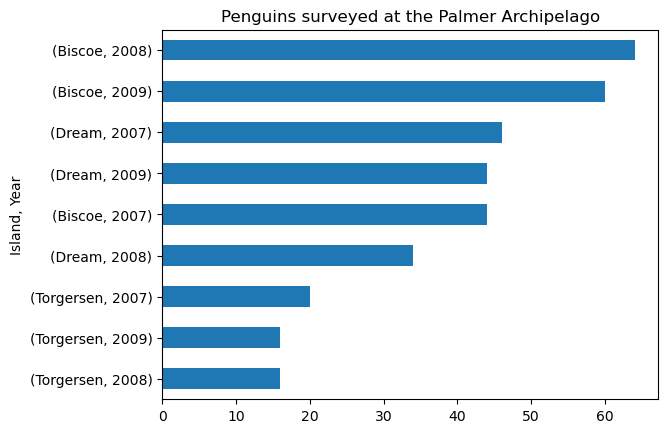

In [10]:
(penguins.groupby(['island','year'])
         .count()
         .species
         .sort_values()
         .plot(kind='barh',
                title='Penguins surveyed at the Palmer Archipelago',
                ylabel=('Island, Year'))
         )

## Check in
1. Use the max() method for pandas.DataFrames to calculate the maximum value of a penguin’s body mass by year and species.

2. Use (1) to display the highest body masses per year and species as a bar plot in descending order.

In [14]:
# 1
max_body_mass = penguins.groupby(['year', 'species']).body_mass_g.max()

<Axes: title={'center': 'Maximum Penguin Body Mass by Year and Species'}, xlabel='Body Mass (g)', ylabel='Year, Species'>

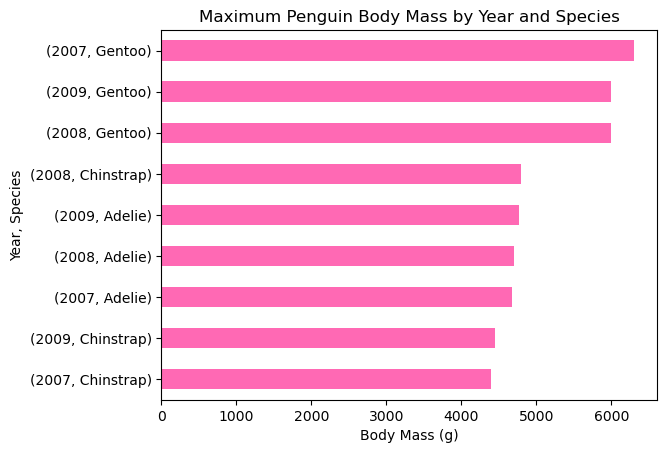

In [26]:
# 2
# sort_values automatically sorts output in descending order
max_body_mass.sort_values().plot(kind = 'barh', 
                                title = "Maximum Penguin Body Mass by Year and Species",
                                ylabel = "Year, Species", 
                                xlabel = "Body Mass (g)", 
                                color = "hotpink")